<a href="https://colab.research.google.com/github/SiyumiJayawardhane/OralCancerEarlyDetection-DSGP/blob/Prediction-of-textual-data-I/Text_Data_Analysis_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Dataset Analysis***

**1. Import Libraries**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score)
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle

**2. Load and Inspect the Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/DSGP/Siyumi/oral_cancer_prediction_dataset (1).csv')

In [6]:
#Display information
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    160292 non-null  int64  
 1   Country               160292 non-null  object 
 2   Gender                160292 non-null  object 
 3   Age                   160292 non-null  int64  
 4   Tobacco_Use           160292 non-null  int64  
 5   Alcohol_Use           160292 non-null  int64  
 6   Socioeconomic_Status  160292 non-null  object 
 7   Diagnosis_Stage       160292 non-null  object 
 8   Treatment_Type        160292 non-null  object 
 9   Survival_Rate         160292 non-null  float64
 10  HPV_Related           160292 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.5+ MB
None


In [7]:
#Load 5 rows
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
   ID   Country  Gender  Age  Tobacco_Use  Alcohol_Use Socioeconomic_Status  \
0   1  Ethiopia    Male   34            1            1                 High   
1   2    Turkey  Female   84            1            1                 High   
2   3    Turkey  Female   62            1            1               Middle   
3   4  Tanzania    Male   48            1            1               Middle   
4   5    France    Male   26            1            1               Middle   

  Diagnosis_Stage Treatment_Type  Survival_Rate  HPV_Related  
0           Early   Radiotherapy       0.826235            0  
1        Moderate   Radiotherapy       0.376607            0  
2           Early   Radiotherapy       0.736296            1  
3        Moderate    Combination       0.786118            0  
4           Early   Radiotherapy       0.830411            0  


**3. Understand Numerical Features**

In [8]:
# Remove unnecessary features based on correlation and domain knowledge
columns_to_drop = ['ID', 'Treatment_Type', 'Survival_Rate']  # Irrelevant for prediction
print(f"\nDropping columns: {columns_to_drop}")
data = data.drop(columns=columns_to_drop)


Dropping columns: ['ID', 'Treatment_Type', 'Survival_Rate']


In [9]:
# Select numeric variables
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Print numeric variables
print("Numeric Variables:")
print(numeric_columns.head())

Numeric Variables:
   Age  Tobacco_Use  Alcohol_Use  HPV_Related
0   34            1            1            0
1   84            1            1            0
2   62            1            1            1
3   48            1            1            0
4   26            1            1            0


**4. Histograms for Numerical Features**

**5. Box Plot to Identify Outliers**

**7. Understand Categorical Features**

In [10]:
# Select categorical variables
categorical_columns = data.select_dtypes(include=['object'])

# Print categorical variables
print("Categorical Variables:")
print(categorical_columns.head())

Categorical Variables:
    Country  Gender Socioeconomic_Status Diagnosis_Stage
0  Ethiopia    Male                 High           Early
1    Turkey  Female                 High        Moderate
2    Turkey  Female               Middle           Early
3  Tanzania    Male               Middle        Moderate
4    France    Male               Middle           Early


**8. Unique values of each column**

In [11]:
# Print unique values of each column before encoding
print("Unique values before encoding:")
for column in data.columns:
    print(f"{column}: {data[column].unique()}")
print("-" * 40)

# Label Encoding for 'Country' (high cardinality)
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])

# One-Hot Encoding for other categorical columns (excluding target)
categorical_columns = ['Gender', 'Socioeconomic_Status']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Print unique values of each column after encoding
print("Unique values after encoding:")
for column in data.columns:
    print(f"{column}: {data[column].unique()}")
print("-" * 40)

# Print unique values of target attribute (Diagnosis_Stage)
print("Unique values of target attribute (Diagnosis_Stage):")
print(data['Diagnosis_Stage'].unique())

Unique values before encoding:
Country: ['Ethiopia' 'Turkey' 'Tanzania' 'France' 'China' 'Colombia' 'Japan'
 'Nigeria' 'Brazil' 'Kenya' 'United Kingdom' 'Germany' 'Myanmar'
 'Philippines' 'Russia' 'Thailand' 'Mexico' 'Bangladesh' 'Iran'
 'United States' 'South Africa' 'DR Congo' 'Spain' 'Egypt' 'Italy'
 'Indonesia' 'Pakistan' 'India' 'South Korea' 'Vietnam']
Gender: ['Male' 'Female']
Age: [34 84 62 48 26 22 76 49 60 20 86 72 28 27 31 41 36 50 25 37 67 40 21 70
 23 57 24 39 80 30 55 32 43 66 83 79 81 35 33 69 88 71 59 75 51 52 78 38
 65 44 29 64 82 42 87 56 73 53 58 77 61 54 63 74 45 68 46 85 47 89]
Tobacco_Use: [1 0]
Alcohol_Use: [1 0]
Socioeconomic_Status: ['High' 'Middle' 'Low']
Diagnosis_Stage: ['Early' 'Moderate' 'Late']
HPV_Related: [0 1]
----------------------------------------
Unique values after encoding:
Country: [ 6 26 24  7  2  3 13 17  1 14 27  8 16 19 20 25 15  0 11 28 21  4 23  5
 12 10 18  9 22 29]
Age: [34 84 62 48 26 22 76 49 60 20 86 72 28 27 31 41 36 50 25 37 67 40 2

**9. Handle Missing Values**

In [12]:
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
Country                        0
Age                            0
Tobacco_Use                    0
Alcohol_Use                    0
Diagnosis_Stage                0
HPV_Related                    0
Gender_Male                    0
Socioeconomic_Status_Low       0
Socioeconomic_Status_Middle    0
dtype: int64


**10. Handle Duplicate Values**

In [13]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows before removal: {data.duplicated().sum()}")


Number of duplicate rows before removal: 54647


# **Feature Engineering**

**11. Label Encoding**

**12. Map Target Variable**

In [14]:
# Map risk levels to numerical categories
data['Diagnosis_Stage'] = data['Diagnosis_Stage'].map({'Early': 0, 'Moderate': 1, 'Late': 2})

In [15]:
# Force data type conversion
data['Diagnosis_Stage'] = pd.to_numeric(data['Diagnosis_Stage'])

**13. Check Imbalacing of Dataset**

In [16]:
#Analyze Target Imbalance
target_column = 'Diagnosis_Stage'
print("\nTarget value distribution:")
print(data[target_column].value_counts())


Target value distribution:
Diagnosis_Stage
1    63939
0    48287
2    48066
Name: count, dtype: int64


<Axes: xlabel='Diagnosis_Stage'>

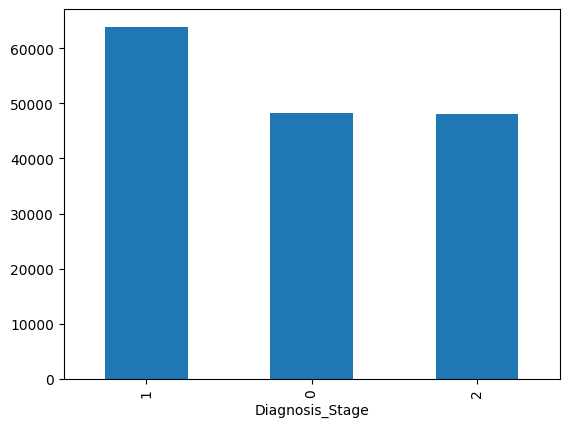

In [17]:
#Plot Imbalance dataset
data[target_column].value_counts().plot(kind='bar')

**14. Handle Imbalancing Uning SMOTE**

In [18]:
# Handle class imbalance using SMOTE
X = data.drop(columns=[target_column])
y = data[target_column]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
Diagnosis_Stage
0    63939
1    63939
2    63939
Name: count, dtype: int64


<Axes: xlabel='Diagnosis_Stage'>

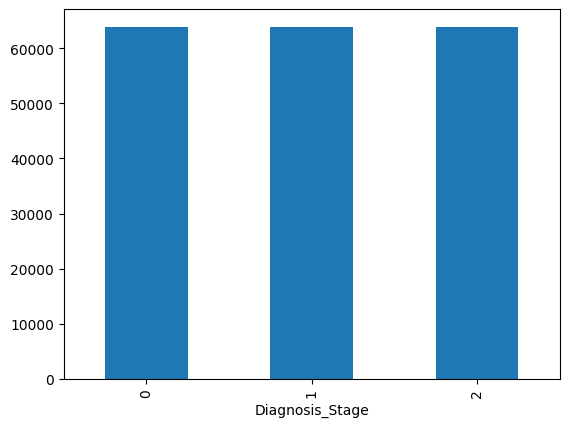

In [19]:
 #Plot the balace dataset
 pd.Series(y_resampled).value_counts().plot(kind='bar')

**15. Correlation Analysis**

In [20]:
print("\nCorrelation Analysis:")
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Diagnosis_Stage'].sort_values(ascending=False)
print(correlation_with_target)


Correlation Analysis:
Diagnosis_Stage                1.000000
Country                        0.001734
Socioeconomic_Status_Middle    0.001222
Alcohol_Use                    0.000972
Socioeconomic_Status_Low       0.000904
Gender_Male                   -0.001402
Tobacco_Use                   -0.002039
HPV_Related                   -0.003183
Age                           -0.004759
Name: Diagnosis_Stage, dtype: float64


**16. Visualization of Correlation values**

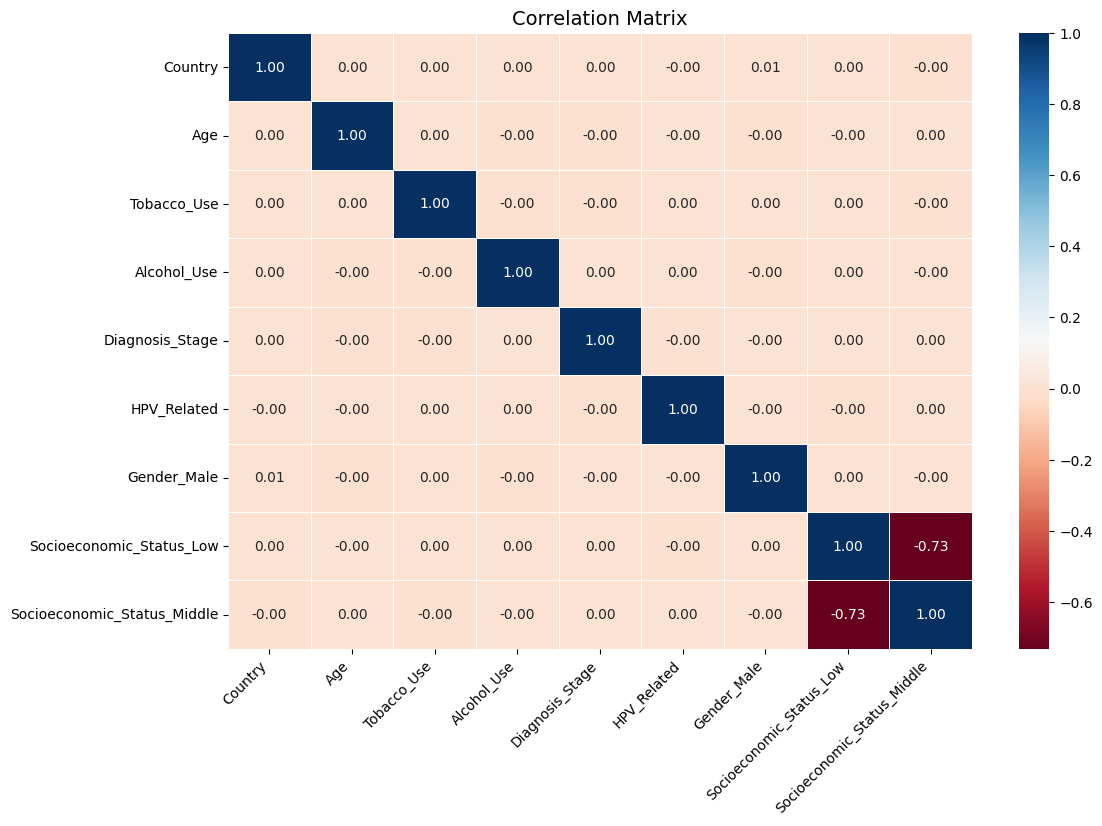

In [21]:
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdBu',  # Alternative colormap for better contrast
    fmt=".2f",
    linewidths=0.5,  # Add lines for better separation
    annot_kws={"size": 10}  # Adjust annotation font size
)
plt.title("Correlation Matrix", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.show()

**17. Features Selection**

**18. Dataset Splitting**

In [22]:
# Print remaining features
print("\nRemaining features after dropping unnecessary columns:")
print(list(data.columns))


Remaining features after dropping unnecessary columns:
['Country', 'Age', 'Tobacco_Use', 'Alcohol_Use', 'Diagnosis_Stage', 'HPV_Related', 'Gender_Male', 'Socioeconomic_Status_Low', 'Socioeconomic_Status_Middle']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 134271
Test set size: 57546


In [24]:
# Save feature names before scaling (to maintain correct order)
feature_names = X_train.columns.tolist()
print(feature_names)
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)

['Country', 'Age', 'Tobacco_Use', 'Alcohol_Use', 'HPV_Related', 'Gender_Male', 'Socioeconomic_Status_Low', 'Socioeconomic_Status_Middle']


**19. Feature Scaling**

In [25]:
# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler to use during predictions
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Data preprocessing completed.")

Data preprocessing completed.


In [ ]:
import numpy as np
import pickle
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

# Initialize and train SVR model
svr_model = SVR(C=1.0, kernel='rbf', gamma='scale')
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

# Convert regression outputs to classification labels
def categorize_predictions(y_pred):
    return np.round(y_pred).astype(int)  # Round to nearest class (0, 1, 2)

y_train_class = categorize_predictions(y_train_pred_svr)
y_test_class = categorize_predictions(y_test_pred_svr)

# Evaluation Metrics
print("\n🔹 SVR Regression Metrics:")
print(f"   🔹 Train MSE: {mean_squared_error(y_train, y_train_pred_svr):.4f}")
print(f"   🔹 Train R²: {r2_score(y_train, y_train_pred_svr):.4f}")
print(f"   🔹 Test MSE: {mean_squared_error(y_test, y_test_pred_svr):.4f}")
print(f"   🔹 Test R²: {r2_score(y_test, y_test_pred_svr):.4f}")

# Classification Reports
print("\n🔹 SVR Classification Report on Training Data:")
print(classification_report(y_train, y_train_class))

print("\n🔹 SVR Classification Report on Test Data:")
print(classification_report(y_test, y_test_class))

# Save the trained SVR model
with open('svr_model.pkl', 'wb') as file:
    pickle.dump(svr_model, file)

print("\n✅ SVR model saved as 'svr_model.pkl'.")

# **SVM Model Training**

In [ ]:
pip install tensorflow scikit-learn numpy matplotlib

In [ ]:
pip install tensorflow

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

# Prepare the data (Ensure X_train_scaled, X_test_scaled, y_train, y_test are preprocessed)
num_classes = len(np.unique(y_train))
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

# Build the Neural Network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Increased neurons
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),  # Reduced learning rate for stability
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_onehot,
                    validation_split=0.1,
                    epochs=100,  # Increased epochs for better training
                    batch_size=32,
                    verbose=1)

# Evaluate the model on the test data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_onehot, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_onehot, verbose=0)

print(f"\n🔹 Training Accuracy: {train_accuracy:.2f}")
print(f"🔹 Test Accuracy: {test_accuracy:.2f}")

# Make predictions
y_prob_nn = model.predict(X_test_scaled)
y_pred_nn = np.argmax(y_prob_nn, axis=1)

# Classification report and ROC-AUC score
print("\n🔹 Neural Network Classification Report on Test Data:")
print(classification_report(y_test, y_pred_nn))
print(f"🔹 Neural Network ROC-AUC Score on Test Data: {roc_auc_score(y_test, y_prob_nn, multi_class='ovr'):.2f}")

# Classification report for training data
y_train_prob_nn = model.predict(X_train_scaled)
y_train_pred_nn = np.argmax(y_train_prob_nn, axis=1)

print("\n🔹 Neural Network Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred_nn))
print(f"🔹 Neural Network ROC-AUC Score on Training Data: {roc_auc_score(y_train, y_train_prob_nn, multi_class='ovr'):.2f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

# Save the trained model
model.save('nn_model.h5')

print("\n✅ Neural Network model saved as 'nn_model.h5'.")

In [ ]:
import pickle
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report

# Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on Test Data
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("\n🔹 XGBoost Regression Metrics on Test Data:")
print(f"   🔹 Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_xgb):.4f}")
print(f"   🔹 R-squared Score (R²): {r2_score(y_test, y_pred_xgb):.4f}")

# Predict on Training Data
y_train_pred_xgb = xgb_model.predict(X_train_scaled)

print("\n🔹 XGBoost Regression Metrics on Training Data:")
print(f"   🔹 Mean Squared Error (MSE): {mean_squared_error(y_train, y_train_pred_xgb):.4f}")
print(f"   🔹 R-squared Score (R²): {r2_score(y_train, y_train_pred_xgb):.4f}")

# Convert Regression Predictions to Categories (Ordinal Classification)
def categorize_predictions(y_pred):
    return np.round(y_pred).astype(int)  # Rounding to nearest integer (assuming labels 0,1,2)

y_test_class = categorize_predictions(y_pred_xgb)
y_train_class = categorize_predictions(y_train_pred_xgb)

# Classification Reports
print("\n🔹 XGBoost Classification Report on Test Data:")
print(classification_report(y_test, y_test_class))

print("\n🔹 XGBoost Classification Report on Training Data:")
print(classification_report(y_train, y_train_class))

# Save the trained XGBoost model
with open('xgb_regressor.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print("\n✅ XGBoost Regressor model saved as 'xgb_regressor.pkl'.")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports L1 and L2 penalties
}

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Perform Grid Search for best hyperparameters
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='roc_auc_ovr', verbose=1, n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

# Retrieve best parameters
best_params_lr = grid_search_lr.best_params_
print("\nBest Parameters for Logistic Regression:", best_params_lr)

# Train the best Logistic Regression model
lr_model_best = grid_search_lr.best_estimator_

# Evaluate on Test Data
y_pred_lr = lr_model_best.predict(X_test_scaled)
y_prob_lr = lr_model_best.predict_proba(X_test_scaled)

print("\n🔹 Logistic Regression Classification Report on Test Data:")
print(classification_report(y_test, y_pred_lr))

# Calculate ROC-AUC score for multi-class classification
roc_auc_test = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')
print(f"🔹 Logistic Regression ROC-AUC Score on Test Data: {roc_auc_test:.2f}")

# Evaluate on Training Data
y_train_pred_lr = lr_model_best.predict(X_train_scaled)
y_train_prob_lr = lr_model_best.predict_proba(X_train_scaled)

print("\n🔹 Logistic Regression Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred_lr))

# Calculate ROC-AUC score for multi-class classification
roc_auc_train = roc_auc_score(y_train, y_train_prob_lr, multi_class='ovr')
print(f"🔹 Logistic Regression ROC-AUC Score on Training Data: {roc_auc_train:.2f}")

# Save the trained Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model_best, file)

print("\n✅ Logistic Regression model saved as 'logistic_regression_model.pkl'.")

In [ ]:
import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

# Initialize Random Forest model with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Evaluate on Test Data
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)

# Multi-Class ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr')

print("\n🔹 Random Forest Classification Report on Test Data:")
print(classification_report(y_test, y_pred_rf))
print(f"🔹 Random Forest ROC-AUC Score on Test Data: {roc_auc_rf:.2f}")

# Evaluate on Training Data
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_train_prob_rf = rf_model.predict_proba(X_train_scaled)

roc_auc_rf_train = roc_auc_score(y_train, y_train_prob_rf, multi_class='ovr')

print("\n🔹 Random Forest Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred_rf))
print(f"🔹 Random Forest ROC-AUC Score on Training Data: {roc_auc_rf_train:.2f}")

# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("\n✅ Random Forest model saved as 'random_forest_model.pkl'.")

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pickle

# Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

# Initialize LightGBM model
lgb_model = LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train_scaled, y_train)

# Evaluate on Test Data
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_prob_lgb = lgb_model.predict_proba(X_test_scaled)  # Get probabilities for all classes

print("\nAccuracy of Testing data:", accuracy_score(y_test, y_pred_lgb))
print("\nLightGBM Classification Report on Test Data:")
print(classification_report(y_test, y_pred_lgb))

# Compute Multi-Class ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob_lgb, multi_class="ovr")  # Use 'ovr' or 'ovo'
print(f"LightGBM ROC-AUC Score on Test Data: {roc_auc:.2f}")

# Evaluate on Training Data
y_train_pred_lgb = lgb_model.predict(X_train_scaled)
y_train_prob_lgb = lgb_model.predict_proba(X_train_scaled)

print("\nAccuracy of Training data:", accuracy_score(y_train, y_train_pred_lgb))
print("\nLightGBM Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred_lgb))

# Compute Multi-Class ROC-AUC Score for Training Data
roc_auc_train = roc_auc_score(y_train, y_train_prob_lgb, multi_class="ovr")
print(f"LightGBM ROC-AUC Score on Training Data: {roc_auc_train:.2f}")

# Save the trained LightGBM model
with open('lightGBM_model.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

print("\nLightGBM model saved as 'lightGBM_model.pkl'.")

In [ ]:
pip install keras

In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import load_model
from lightgbm import LGBMClassifier

# Load trained models
with open('svr_model.pkl', 'rb') as file:
    svm_model = pickle.load(file)

with open('xgb_regressor.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

with open('lightGBM_model.pkl', 'rb') as file:
    lgb_model = pickle.load(file)

# Load the neural network model correctly
nn_model = load_model('nn_model.h5')

# Load the scaler and feature names from training
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)  # Ensures correct feature order

# Define categorical and numerical features
categorical_features = ['Country', 'Gender_Male', 'Socioeconomic_Status_Low', 'Socioeconomic_Status_Middle']
numerical_features = ['Age', 'Tobacco_Use', 'Alcohol_Use', 'HPV_Related']

# Define LabelEncoders (Use mappings from training)
label_encoders = {
    'Country': LabelEncoder().fit([
        'Ethiopia', 'Turkey', 'Tanzania', 'France', 'China', 'Colombia', 'Japan',
        'Nigeria', 'Brazil', 'Kenya', 'United Kingdom', 'Germany', 'Myanmar',
        'Philippines', 'Russia', 'Thailand', 'Mexico', 'Bangladesh', 'Iran',
        'United States', 'South Africa', 'DR Congo', 'Spain', 'Egypt', 'Italy',
        'Indonesia', 'Pakistan', 'India', 'South Korea', 'Vietnam'
    ]),
    'Gender_Male': LabelEncoder().fit([True, False]),
    'Socioeconomic_Status_Low': LabelEncoder().fit([True, False]),
    'Socioeconomic_Status_Middle': LabelEncoder().fit([True, False])
}

# Function to get user input
def get_user_input():
    """Take user input for all required features and return a dictionary."""
    user_data = {}

    print("\n🔹 Enter values for the following features:")
    for feature in categorical_features + numerical_features:
        user_data[feature] = input(f"   {feature}: ").strip()

    return user_data

# Take user input
user_data = get_user_input()

# Convert input data into a DataFrame
input_df = pd.DataFrame([user_data])

# Apply Label Encoding to categorical features (ensuring consistency with training)
for feature in categorical_features:
    if user_data[feature] in label_encoders[feature].classes_:
        input_df[feature] = label_encoders[feature].transform([user_data[feature]])
    else:
        default_value = label_encoders[feature].classes_[0]
        print(f"⚠️ Warning: Unseen category '{user_data[feature]}' for {feature}. Using '{default_value}' as default.")
        input_df[feature] = label_encoders[feature].transform([default_value])

# Ensure numerical columns are correctly formatted
input_df[numerical_features] = input_df[numerical_features].astype(float)

# Ensure features are in the same order as training
input_df = input_df.reindex(columns=feature_names, fill_value=0)

# Standard Scaling (Use same scaler from training)
input_scaled = scaler.transform(input_df)

# Make predictions using all models
nn_prob = nn_model.predict(input_scaled)[0]  # Neural Network
svm_prob = svm_model.predict(input_scaled)[0]  # SVM
xgb_prob = xgb_model.predict(input_scaled)[0]  # XGBoost
lgb_prob = lgb_model.predict_proba(input_scaled)[0]  # LightGBM multi-class probabilities

# Averaging Model Outputs for Final Probability
final_probabilities = (nn_prob + svm_prob + xgb_prob + lgb_prob) / 4  # Averaging across models

# Extract probabilities for each stage
prob_early = final_probabilities[0]  # Probability of Early stage
prob_moderate = final_probabilities[1]  # Probability of Moderate stage
prob_late = final_probabilities[2]  # Probability of Late stage

# Display results
print("\n🔹 Model Predictions for Oral Cancer Diagnosis Stage:")
print(f"   🚀 XGBoost Probability (Early: {xgb_prob[0]:.4f}, Moderate: {xgb_prob[1]:.4f}, Late: {xgb_prob[2]:.4f})")
print(f"   ⚡ SVM Probability (Early: {svm_prob[0]:.4f}, Moderate: {svm_prob[1]:.4f}, Late: {svm_prob[2]:.4f})")
print(f"   🌳 Neural Network Probability (Early: {nn_prob[0]:.4f}, Moderate: {nn_prob[1]:.4f}, Late: {nn_prob[2]:.4f})")
print(f"   🔆 LightGBM Probability (Early: {lgb_prob[0]:.4f}, Moderate: {lgb_prob[1]:.4f}, Late: {lgb_prob[2]:.4f})")

print("\n🎯 **Final Averaged Probabilities:**")
print(f"   🟢 Early Stage Probability: {prob_early:.4f}")
print(f"   🟠 Moderate Stage Probability: {prob_moderate:.4f}")
print(f"   🔴 Late Stage Probability: {prob_late:.4f}")

# Find the class with the highest probability
max_prob = max(prob_early, prob_moderate, prob_late)

if max_prob == prob_late:
    print("   🛑 **Prediction: Late Stage Cancer Detected** (High Probability)")
elif max_prob == prob_moderate:
    print("   ⚠️ **Prediction: Moderate Stage Cancer Detected** (Medium Probability)")
else:
    print("   ✅ **Prediction: Early Stage Cancer Detected** (Low Probability)")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'svr_model.pkl'

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Wrap XGBoost and SVM in a pipeline to ensure compatibility
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Define base models
base_models = [
    ('xgb', Pipeline([('scaler', StandardScaler()), ('xgb', xgb_model)])),
    ('svm', Pipeline([('scaler', StandardScaler()), ('svm', svm_model)]))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Make predictions
stacking_preds = stacking_model.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:56:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
import shap
import lime
import lime.lime_tabular
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load trained models
with open('nn_model.pkl', 'rb') as file:
    nn_model = pickle.load(file)

with open('svm_model_tuned.pkl', 'rb') as file:
    svm_model = pickle.load(file)

with open('xgb_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

# Load scaler and feature names
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

# Assume input_scaled is already prepared
# input_scaled = scaler.transform(input_df)

# --- SHAP Analysis ---
shap.initjs()

# SHAP for XGBoost (Tree-based model)
explainer_xgb = shap.Explainer(xgb_model, feature_names=feature_names)
shap_values_xgb = explainer_xgb(input_scaled)
shap.summary_plot(shap_values_xgb, feature_names=feature_names)
plt.show()

# SHAP for Neural Network (Kernel-based method)
explainer_nn = shap.KernelExplainer(nn_model.predict_proba, shap.sample(input_scaled, 100))
shap_values_nn = explainer_nn.shap_values(input_scaled)
shap.summary_plot(shap_values_nn[1], feature_names=feature_names)
plt.show()

# SHAP for SVM
explainer_svm = shap.KernelExplainer(svm_model.predict_proba, shap.sample(input_scaled, 100))
shap_values_svm = explainer_svm.shap_values(input_scaled)
shap.summary_plot(shap_values_svm[1], feature_names=feature_names)
plt.show()

# --- LIME Analysis ---
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=scaler.transform(pd.DataFrame([user_data], columns=feature_names)),
    feature_names=feature_names,
    class_names=['No Cancer', 'Cancer'],
    discretize_continuous=True
)

# Explain the prediction
exp = lime_explainer.explain_instance(input_scaled[0], nn_model.predict_proba, num_features=len(feature_names))
exp.show_in_notebook()

# **Accuracy comparison of models**

In [ ]:
# Create a dictionary to store the results
results = {
    'Model': ['SVM', 'Neural Network', 'XGBoost'],
    'Train Accuracy': [
        accuracy_score(y_train, svm_model_best.predict(X_train_scaled)),
        accuracy_score(y_train, nn_model_best.predict(X_train_scaled)),
        accuracy_score(y_train, xgb_model.predict(X_train_scaled))
    ],
    'Test Accuracy': [
        accuracy_score(y_test, svm_model_best.predict(X_test_scaled)),
        accuracy_score(y_test, nn_model_best.predict(X_test_scaled)),
        accuracy_score(y_test, xgb_model.predict(X_test_scaled))
    ]
}

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Plot the comparison
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Training and Testing Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy
plt.show()

# Print the results DataFrame
print(results_df)


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Use k-means to summarize the background data
background_data = shap.kmeans(X_train_scaled, 100)
# Initialize SHAP explainer with the k-means summarized background data
explainer = shap.KernelExplainer(nn_model_best.predict_proba, background_data)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test_scaled)

# Visualize feature importance (summary plot)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

# Visualize SHAP values for a single prediction (force plot)
# Use the correct index for sample data
sample_index = 0  # Choose the sample index (adjust as needed)

# Ensure X_test_scaled is a pandas DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

shap.force_plot(
    explainer.expected_value[1],
    shap_values[1][sample_index, :],
    X_test_scaled_df.iloc[sample_index, :],
    matplotlib=True
)

# Feature importance bar plot
plt.figure(figsize=(5, 5))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar")


In [ ]:
# Install the LIME package if not already installed
!pip install lime

import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Initialize the LIME explainer for the neural network model
explainer = LimeTabularExplainer(
    training_data=X_train_scaled.values,
    feature_names=X.columns,
    class_names=['Non-Cancer', 'Cancer'],
    mode='classification'
)

# Select a random sample from the test set for explanation
sample_index = np.random.randint(0, len(X_test_scaled))
sample_data = X_test_scaled.iloc[sample_index]

# Convert the sample data to a NumPy array
sample_data_array = sample_data.values.reshape(1, -1)

# Generate LIME explanation for the selected sample
explanation = explainer.explain_instance(
    data_row=sample_data_array[0],
    predict_fn=nn_model_best.predict_proba
)

# Visualize the explanation in the notebook
explanation.show_in_notebook(show_table=True)

# Save the explanation as an HTML file (optional)
explanation.save_to_file("lime_explanation_neural_network.html")

print("LIME explanation saved as 'lime_explanation_neural_network.html'.")
